In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from scipy import integrate

from utils import *
from AnalyseDefectsMinimal import AnalyseDefectsMinimal

In [2]:
def gen_analysis_dict(LL, mode):

    dshort = dict(path = f'C:\\Users\\Simon Andersen\\Documents\\Uni\\Speciale\\Hyperuniformity\\na{LL}sd', \
              suffix = "short", priority = -1, LX = LL, Nframes = 200, Ninfo = 2000)
    dlong = dict(path = f'C:\\Users\\Simon Andersen\\Documents\\Uni\\Speciale\\Hyperuniformity\\na{LL}sd_l', \
                suffix = "l", priority = 0, LX = LL, Nframes = 200, Ninfo = 5000)
    dvery_long = dict(path = f'C:\\Users\\Simon Andersen\\Documents\\Uni\\Speciale\\Hyperuniformity\\na{LL}sd_vl',\
                    suffix = "vl", priority = 3, LX = LL, Nframes = 500, Ninfo = 10000)

    defect_list = [dshort, dlong, dvery_long,] if mode == 'all' else [dshort]
    return defect_list

In [62]:
4 * np.pi**2 * N / L ** 2 * (1 - np.exp(-np.pi * Rmax ** 2 * N / L ** 2 ))

0.04107614442144718

In [67]:
(1 - np.exp(-np.pi * (Rmax / Rmean) ** 2))

0.9741185778236593

In [64]:
N, Rmax, Rmean, np.exp(-np.pi * 33.0 ** 2 * 280.0 / 512.0 ** 2)**2

(280, 33, 30.597852398960477, 0.0006698480138699811)

In [ ]:
array([0.0195, 0.02  , 0.0205, 0.021 , 0.0215, 0.022 , 0.0225, 0.023 ,
       0.0235, 0.024 ])
array([0.00548951, 0.01877215, 0.02243191, 0.06638313, 0.1863329 ,
       0.68436427, 0.90007478, 0.95412184, 0.97411737, 0.98623939])

In [ ]:
 array([0.00234745, 0.0089015 , 0.01508323, 0.05131069, 0.12840679,
        0.65371937, 0.9033489 , 0.95568344, 0.97233266, 0.98375495]))

In [ ]:
L = 512
Rmax = 33
Nlist = [40, 148, 262, 320,420]
Nlist = [7.35442497,  11.82686667,  21.10573333,
        36.77746667, 148.55486667, 257.2365    , 323.13775   ,
       370.243     , 417.07175]
prob_clust = lambda N: (1 - np.exp(- np.pi * Rmax ** 2 * N / L ** 2 )) ** 2

nn_dist = lambda N: L / (2 * np.sqrt(N))

x_vals = Rmax /nn_dist(np.array(Nlist)) 
print(nn_dist(np.array(Nlist)))
print([prob_clust(N) for N in Nlist])   
plt.plot(x_vals, [prob_clust(N) for N in Nlist],'o-')

0.9741185778236593 0.9489070036611885


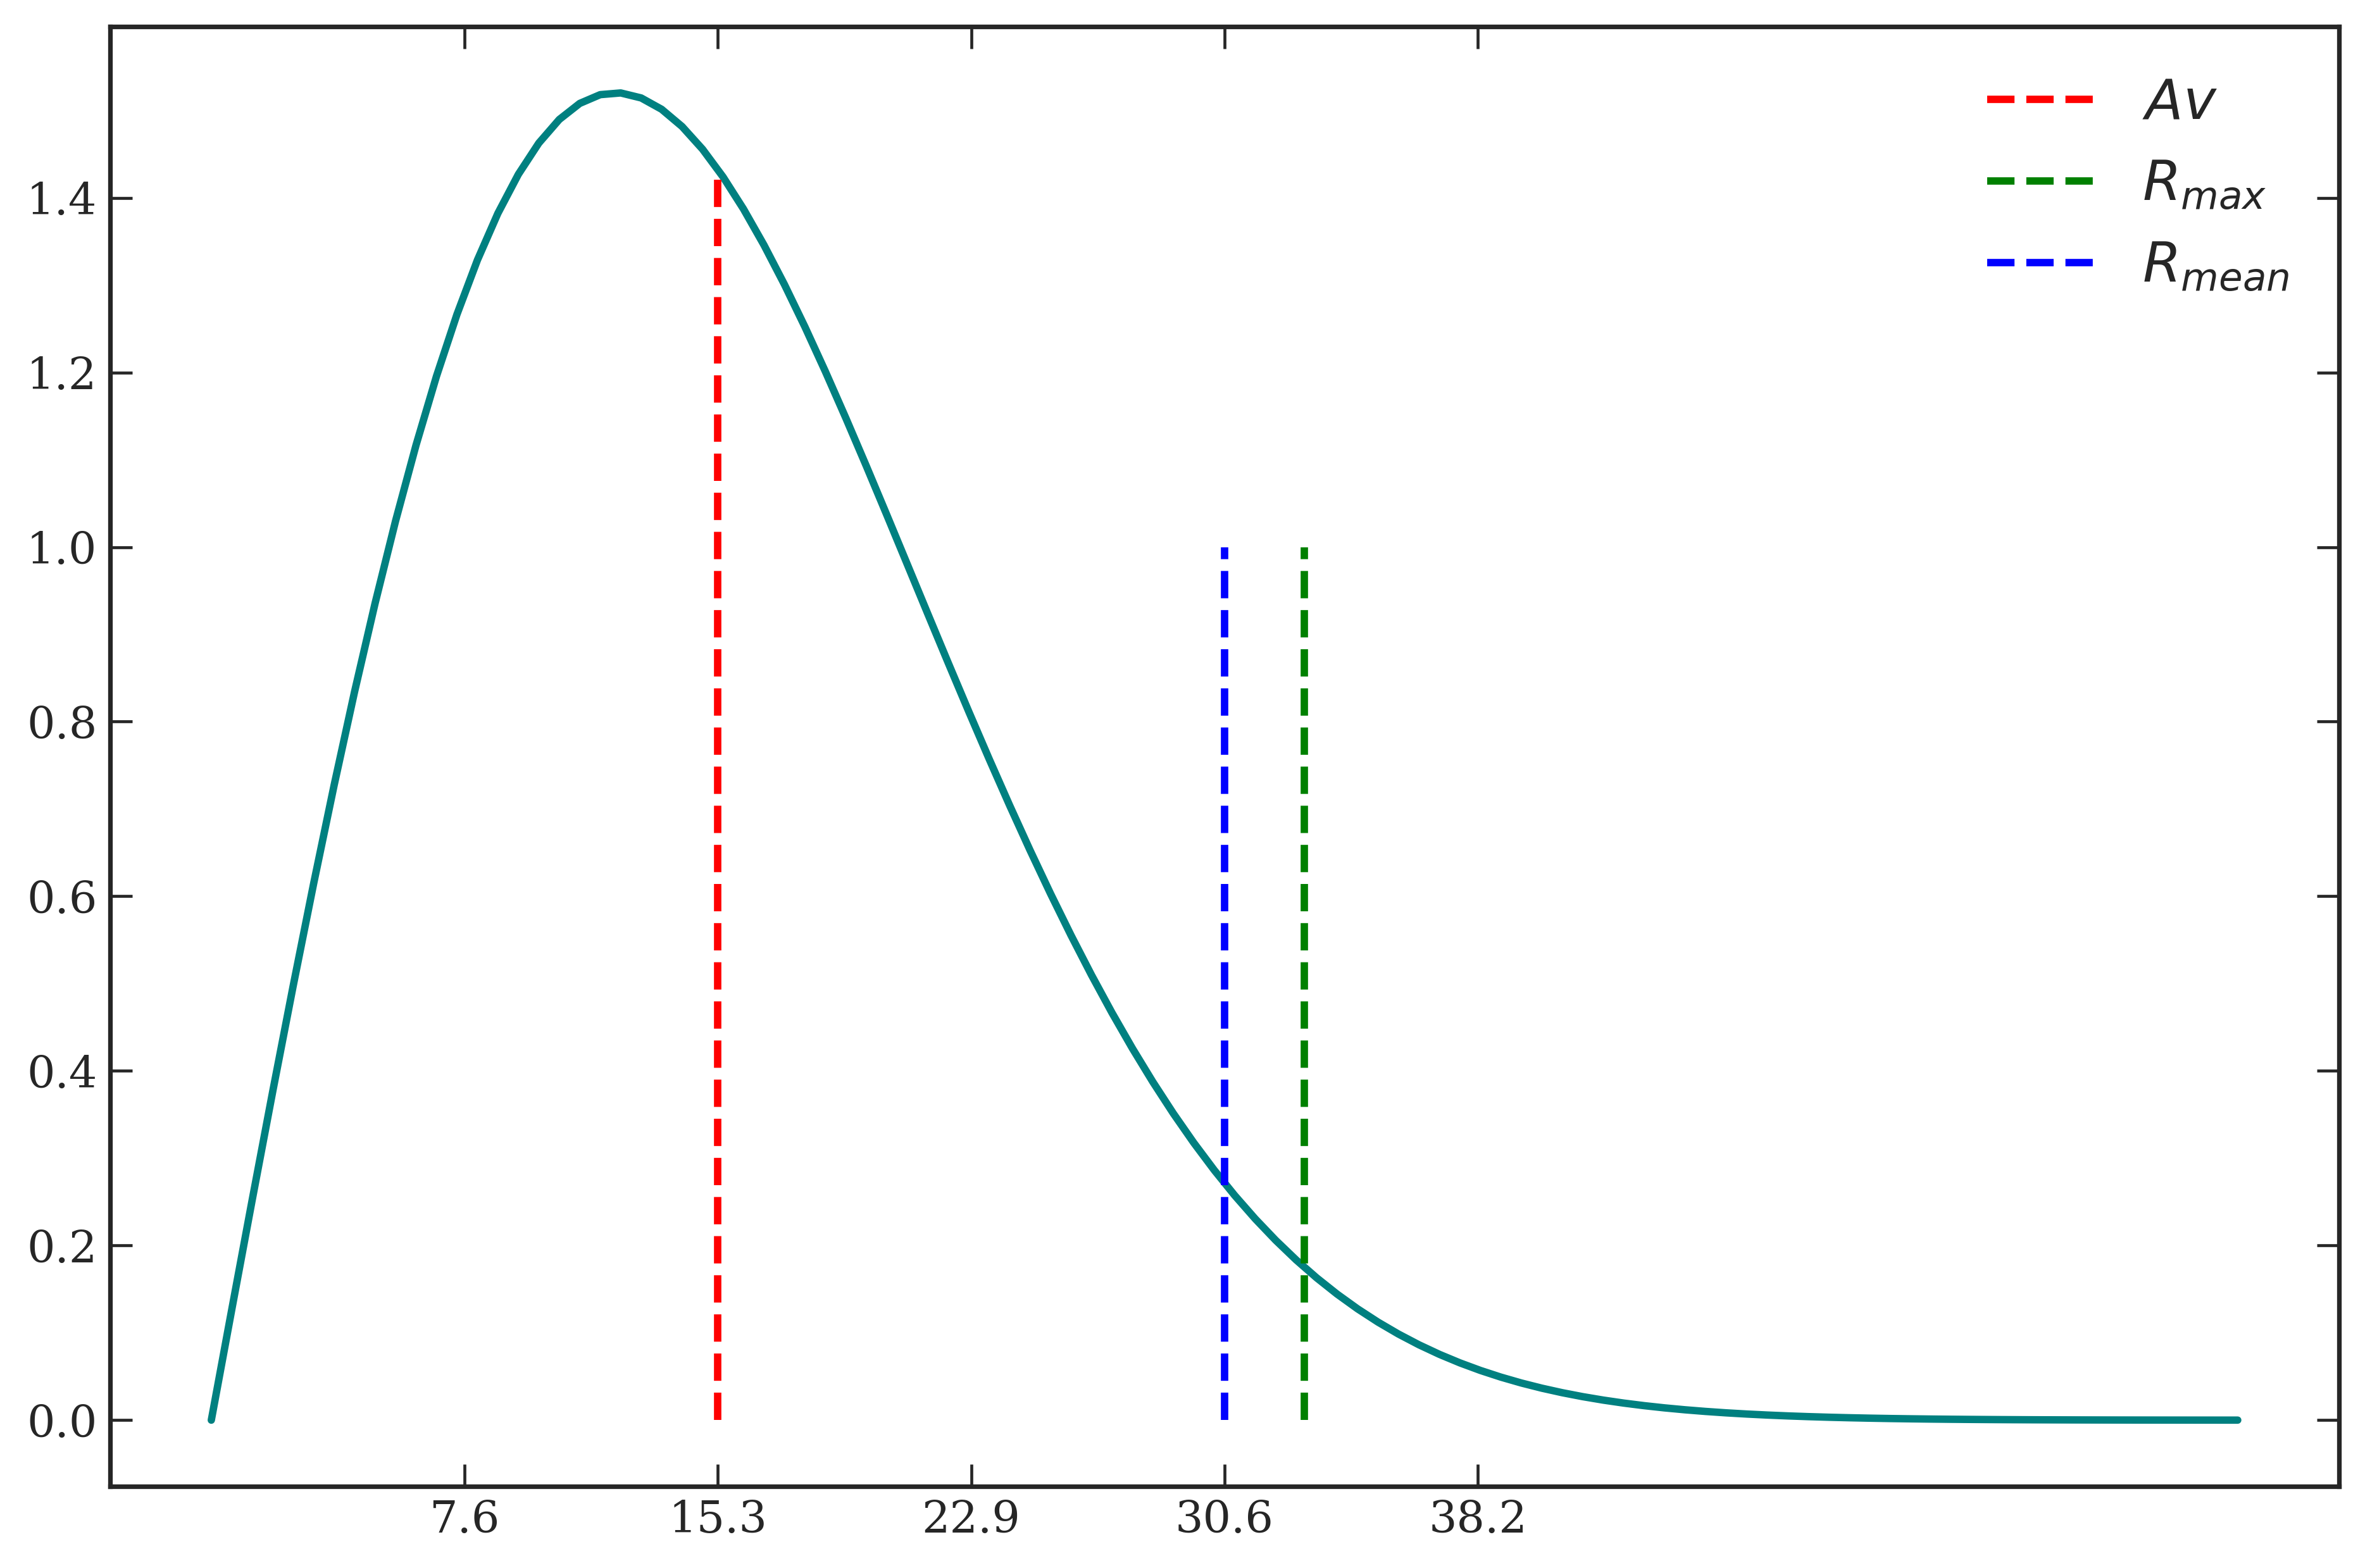

In [50]:
L = 512
N = 280
Rmax = 33
Rmean = L/np.sqrt(N)
Rnn = Rmean / 2

#Rmax = Rmean / (np.pi/2)
#Nhalf = (2 * L / (np.pi * 33)) ** 2
#print(Rmax, Nhalf)
dens_nn = lambda r: (2 * np.pi) * r * np.exp(-np.pi * (r)**2) 

# integrate dens_nn with scipy.integrate from 0 to Rmax/Rmean
integral, _ = integrate.quad(dens_nn, 0, Rmax/Rmean)
print(integral, integral**2)

x_vals=np.linspace(0, 2, 100)
y_vals = dens_nn(x_vals)

fig,ax = plt.subplots()
ax.plot(x_vals, y_vals)
ax.vlines(Rnn/Rmean, 0, dens_nn(Rnn/Rmean), color='r', linestyle='--', label = r'$Av$')
ax.vlines(Rmax/Rmean, 0,1, label = r'$R_{max}$', color='g', linestyle='--')
ax.vlines(1, 0,1, label = r'$R_{mean}$', color='b', linestyle='--')
ax.set(xticks=[0.25, 0.5, 0.75, 1, 1.25], xticklabels=[f'{x*Rmean:.1f}' for x in [0.25, 0.5, 0.75, 1, 1.25]],);
ax.legend()

In [3]:
## lav en p(n_inter, std_max)
## fyr op og lav plot

In [3]:
LL = 512
output_path = f'data\\na512sd'
mode = 'all' # 'all' or 'short'

defect_list = gen_analysis_dict(LL, mode)
 
ad = AnalyseDefectsMinimal(defect_list, output_path=output_path)

extract = False
analyze = False

In [89]:
ad.act_list[2]

(0.018, 0.019, 0.02, 0.0205, 0.021, 0.0215, 0.022, 0.0225)

In [79]:
ad.act_list[1]

(0.023, 0.024, 0.025, 0.026)

In [5]:
if extract:
    ad.extract_results()
if analyze:
    ad.analyze_defects()

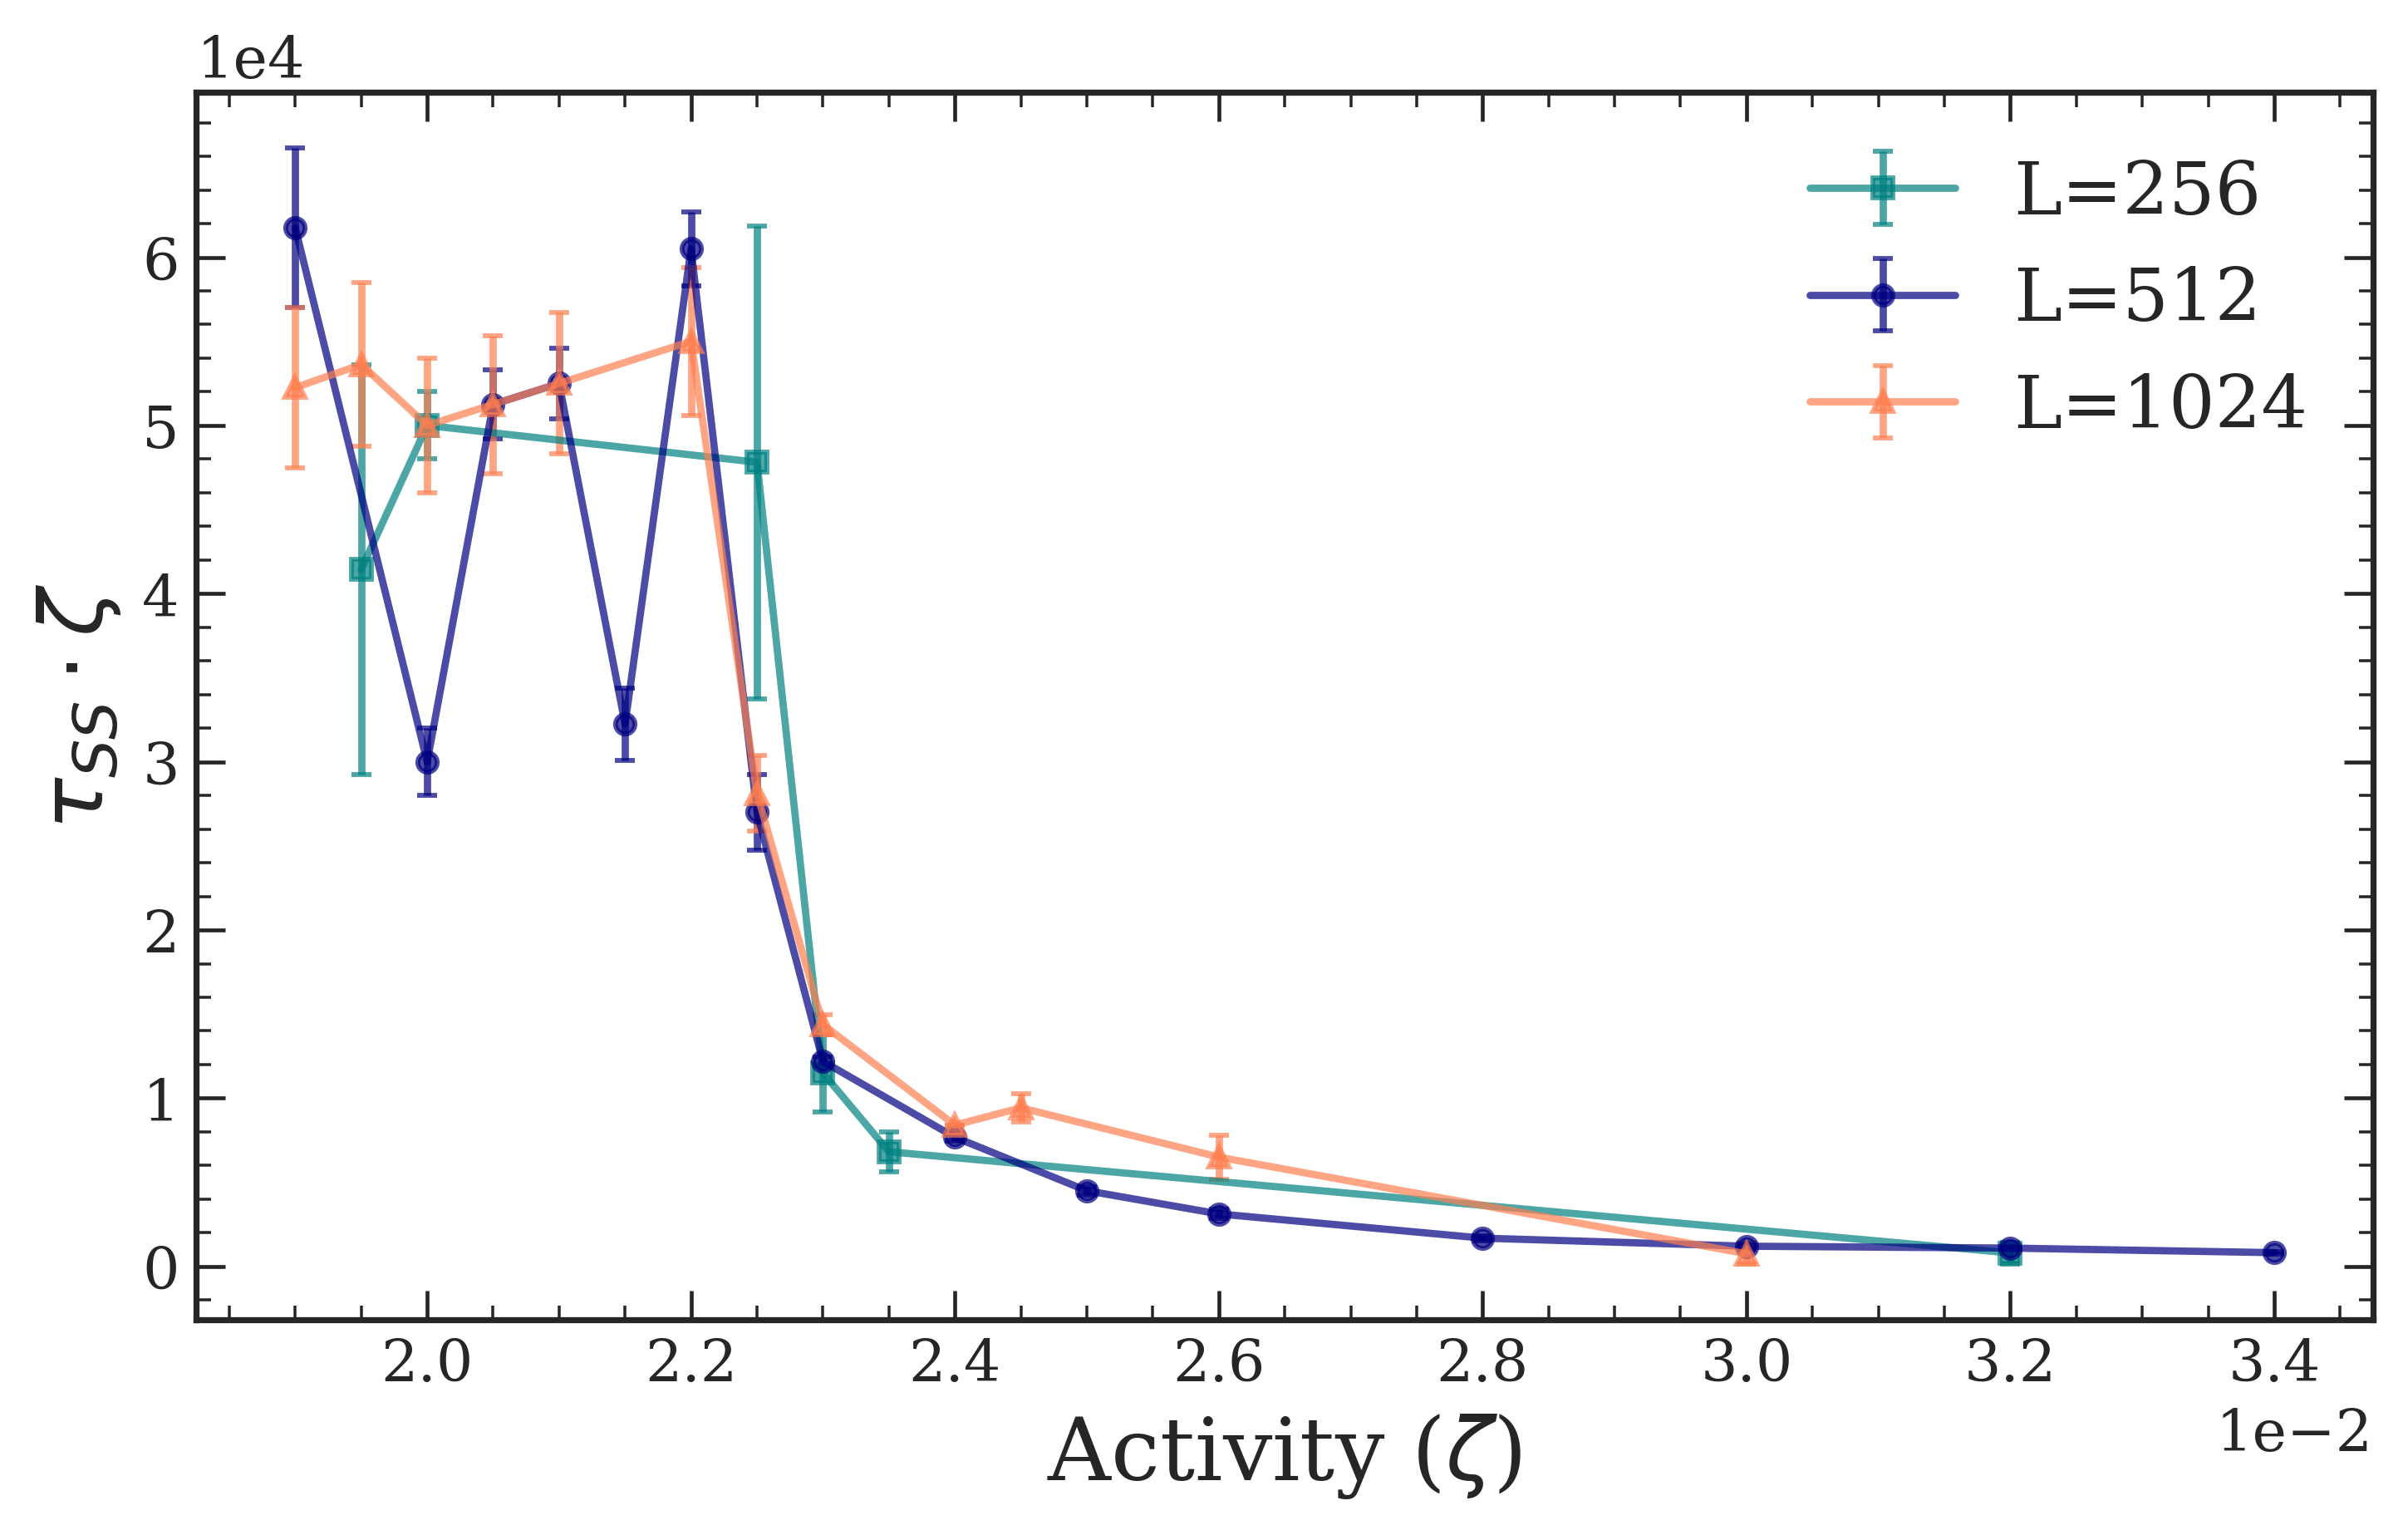

In [17]:
scale_with_activity = True
act_idx_cutoff_512 = 1

X_256 = np.array([0.0195, 0.02, 0.0225, 0.023, 0.0235, 0.032])
Y_256 = np.array([(1.5e6 + 2.75e6)/2, 2.5e6, (1.5e6 + 2.75e6) / 2, 5e5, 2.9e5, 2.5e4])
dY_256 = np.array([np.std([1.5e6, 2.75e6]), 1e5, np.std([1.5e6, 2.75e6]), 1e5, 5e4, 2e4])

X_1024 = np.array([0.019, 0.0195, 0.02, 0.0205, 0.021, 0.022, .0225, 0.023, 0.024, 0.0245, 0.026, 0.03])
Y_1024 = np.array([(2.5e6 + 3e6)/2, (2.5e6 + 3e6)/2, 2.5e6, 2.5e6, 2.5e6, 2.5e6, 1.25e6, (6e5+6.5e5)/2, (3e5+4e5)/2, (3.5e5+4.2e5)/2,(2e5+3e5)/2, 2.5e4])
dY_1024 = np.array([np.std([2.5e6, 3e6]), np.std([2.5e6, 3e6]), 2e5, 2e5, 2e5, 2e5, 1e5, np.std([6e5, 6.5e5]), np.std((3e5+4e5)/2), np.std([3.5e5, 4.2e5]), np.std([2e5, 3e5]), 2e4])


act_list_full = []
for act_list in ad.act_list:
    act_list_full.extend(act_list)
act_list_full.sort()

act_list_full = act_list_full[act_idx_cutoff_512:]
conv_list = np.array([*ad.conv_list[2], *ad.conv_list[1], *ad.conv_list[0]])[act_idx_cutoff_512:]
conv_list_err = np.array([*ad.conv_list_err[2], *ad.conv_list_err[1], *ad.conv_list_err[0]]  )[act_idx_cutoff_512:]

act_p = 1
scaling = 1
conv_list_active = scaling * np.array(act_list_full)**act_p * conv_list
conv_list_active_err = np.array(act_list_full)**act_p * conv_list_err

fig, ax = plt.subplots(1, 1, figsize=(7, 4.5))
marker_list = ['s', 'o', '^', 'v']

for marker, LX, X, Y, dY in zip(marker_list, [256, 512, 1024], [X_256, act_list_full, X_1024],\
                                 [Y_256, conv_list, Y_1024], [dY_256, conv_list_err, dY_1024]):
    if scale_with_activity:
        Y = np.array(Y) * np.array(X)**act_p
        dY = np.array(dY) * np.array(X)**act_p
    ax.errorbar(X, Y, yerr=dY, lw=1.5, fmt = f'{marker}-', capsize=2, label=f'L={LX}', markersize=4, alpha=.7)# ecolor='teal', elinewidth=1,\

#ax.errorbar(X_256, Y_256, yerr=dY_256, fmt='.-', label='L=256', lw=1.5, capsize=2)# ecolor='teal', elinewidth=1,\
#ax.errorbar(act_list_full[1:], conv_list[1:], yerr=conv_list_err[1:], fmt='.-', label=f'L={ad.LX[-1]}', lw=1.5, capsize=2)
#ax.errorbar(X_1024, Y_1024, yerr=dY_1024, fmt='.-', label='L=1024', lw=1.5, capsize=2)# ecolor='teal', elinewidth=1,\
# ecolor='teal', elinewidth=1,\

#ax.errorbar(act_list_full[1:], conv_list_active[1:], yerr=conv_list_active_err[1:], fmt='.-', label=f'L={ad.LX[-1]}', lw=1.5, capsize=2)# ecolor='teal', elinewidth=1,\


act_crit_idx = act_list_full.index(0.022)
scaling = 0.0005
Y = conv_list[act_crit_idx] * np.exp(- (act_list_full[act_crit_idx:] - act_list_full[act_crit_idx]) / scaling)

ax.set(xlabel=rf'Activity ($\zeta$)', ylabel=r'$\tau_{SS} \cdot \zeta$',)
ax.legend()
#ax.set_yscale('log')
#ax.grid(True, which = 'both')
ax.xaxis.set_minor_locator(MultipleLocator(5e-4))
ax.yaxis.set_minor_locator(MultipleLocator(2e3))

In [30]:
ad.conv_list

[array([60000, 40000, 34000, 24000]),
 array([530000, 320000, 180000, 120000]),
 array([4500000, 3250000, 1500000, 2500000, 2500000, 1500000, 2750000,
        1200000])]

64000
44000
34000
24000


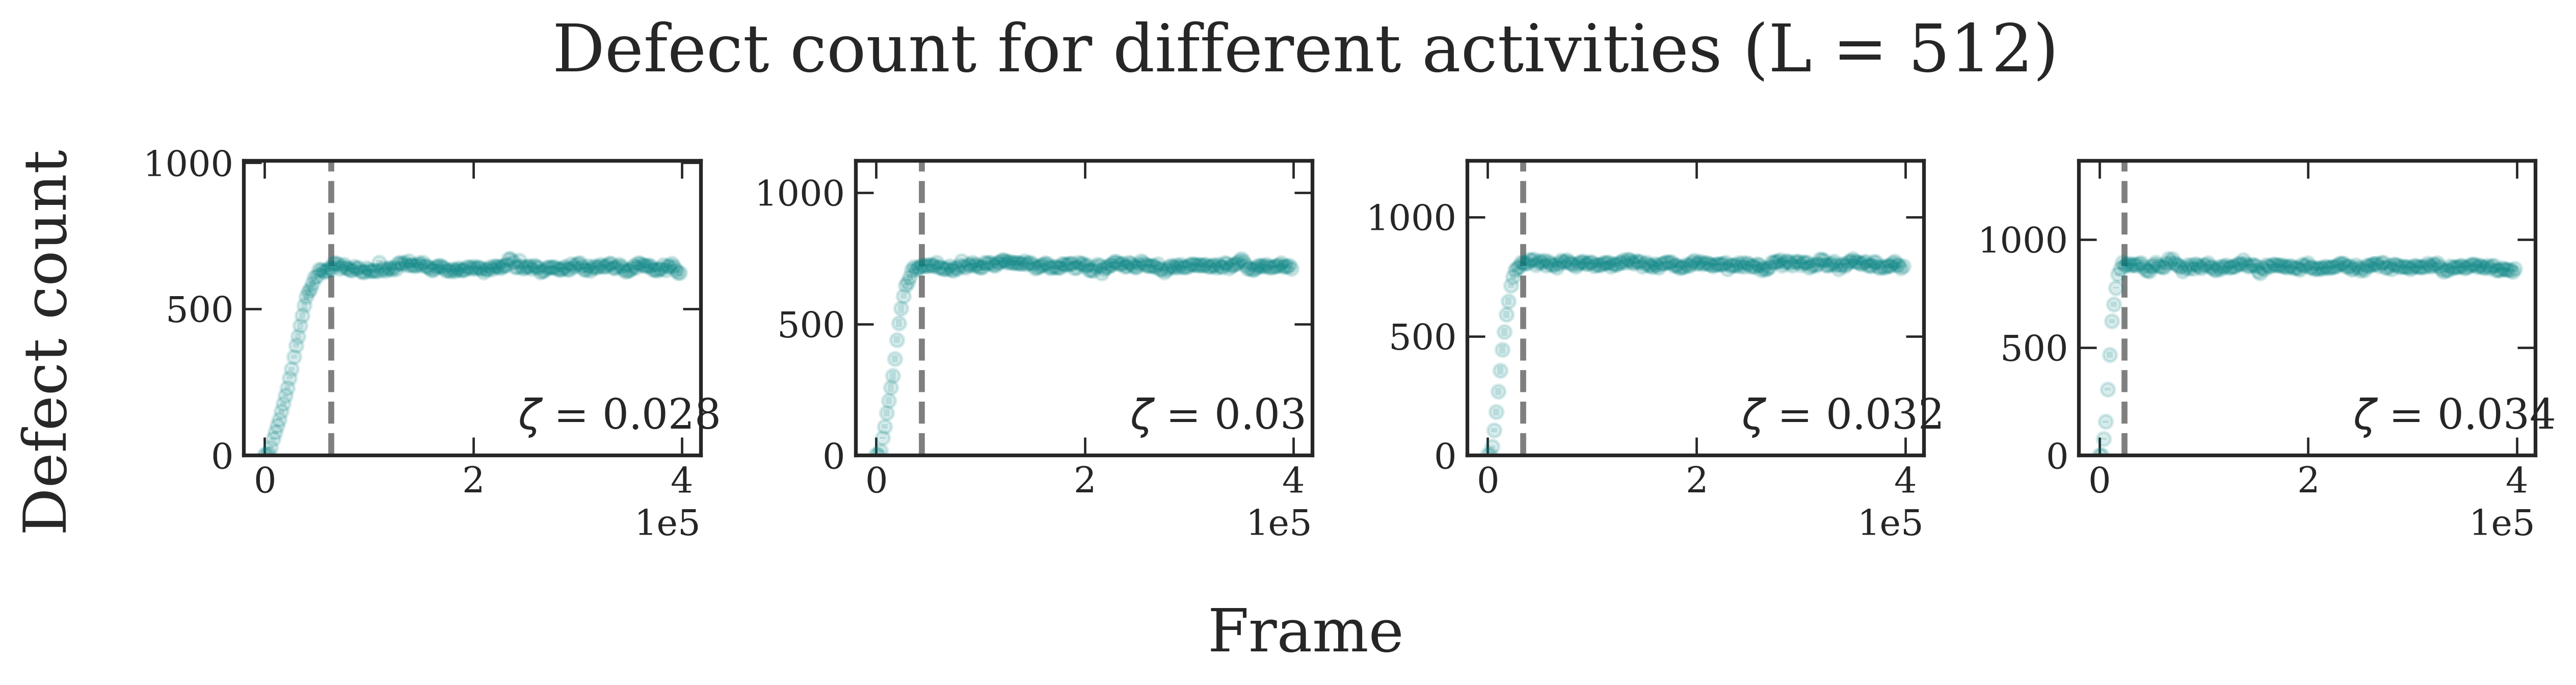

(<Figure size 5040x1260 with 4 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object))

In [8]:
block_len = 5
stationarity_dict = dict(interval_len = block_len, Njump = block_len, Nconverged = 125, max_sigma_dist = 1)
ad.plot_defects_per_activity(Ndataset=0, estimate_stationarity=True, stationarity_dict=stationarity_dict)

In [16]:
ad.conv_list[0]

array([60000, 40000, 34000, 24000])

525000
325000
225000
125000


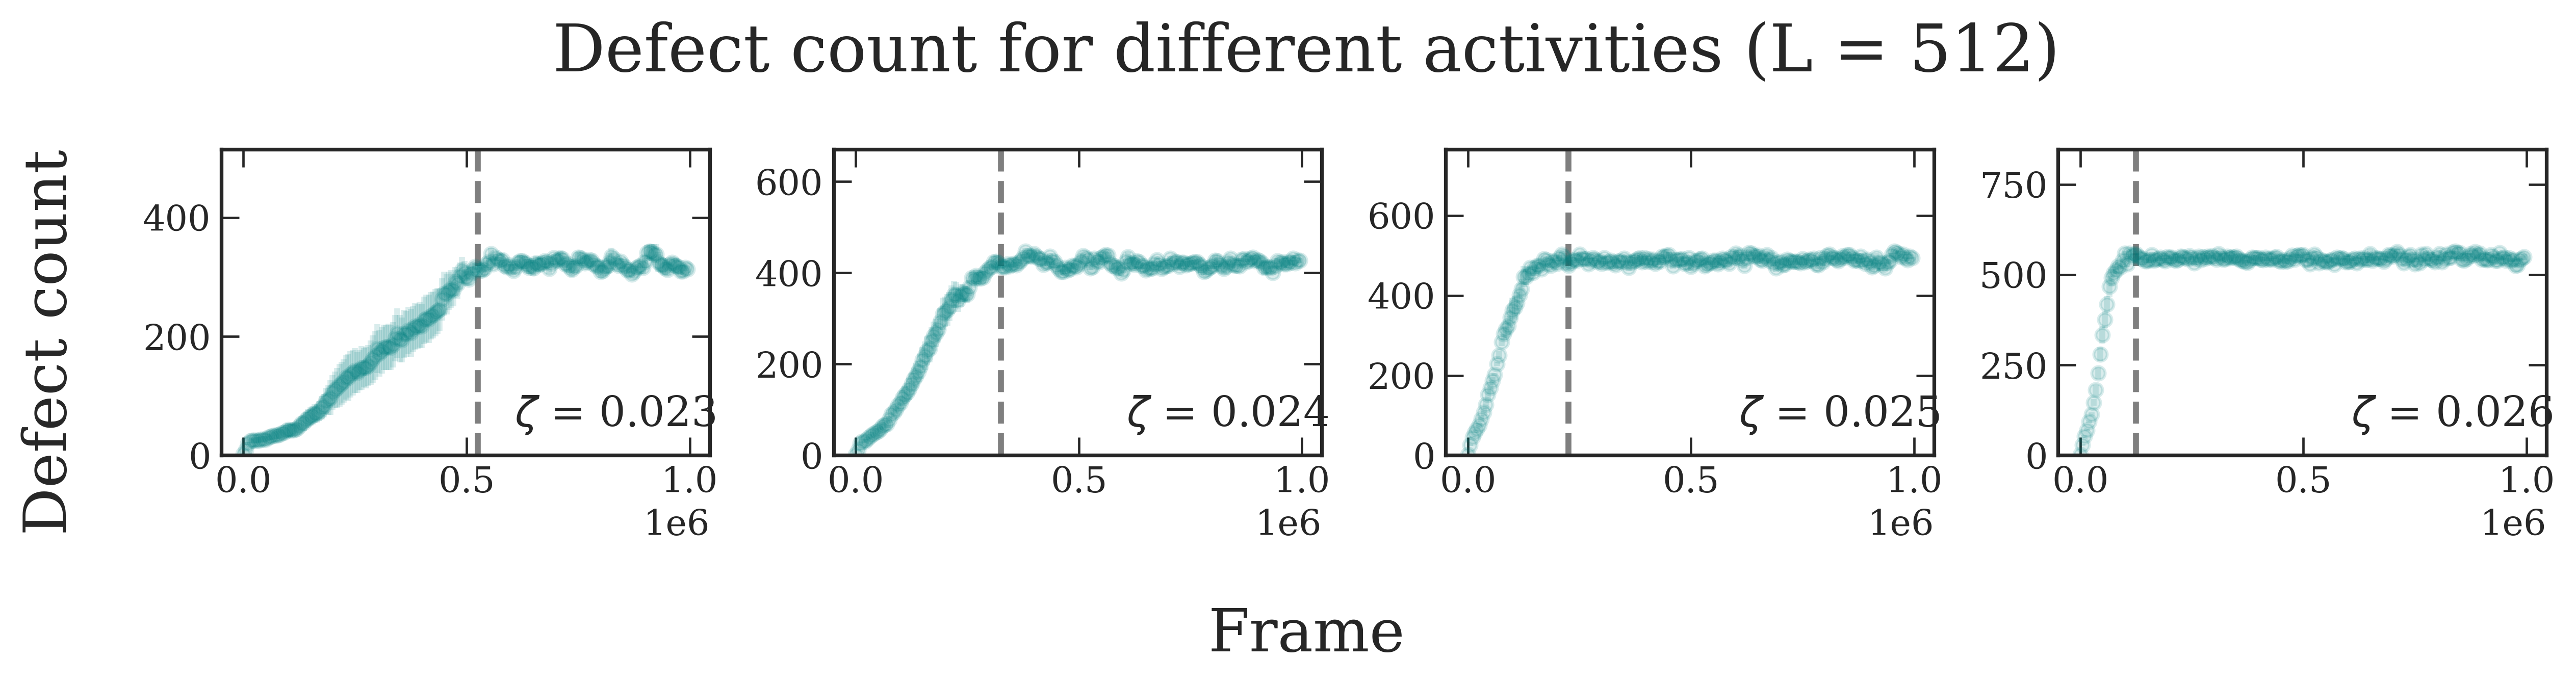

(<Figure size 5040x1260 with 4 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object))

In [14]:
block_len = 10
stationarity_dict = dict(interval_len = block_len, Njump = block_len, Nconverged = 80, max_sigma_dist = .5)
ad.plot_defects_per_activity(Ndataset=1, estimate_stationarity=True, stationarity_dict=stationarity_dict)

In [23]:
ad.conv_list[2][2] += 100000


4500000
3250000
1500000
2500000
2500000
1500000
2750000
1200000


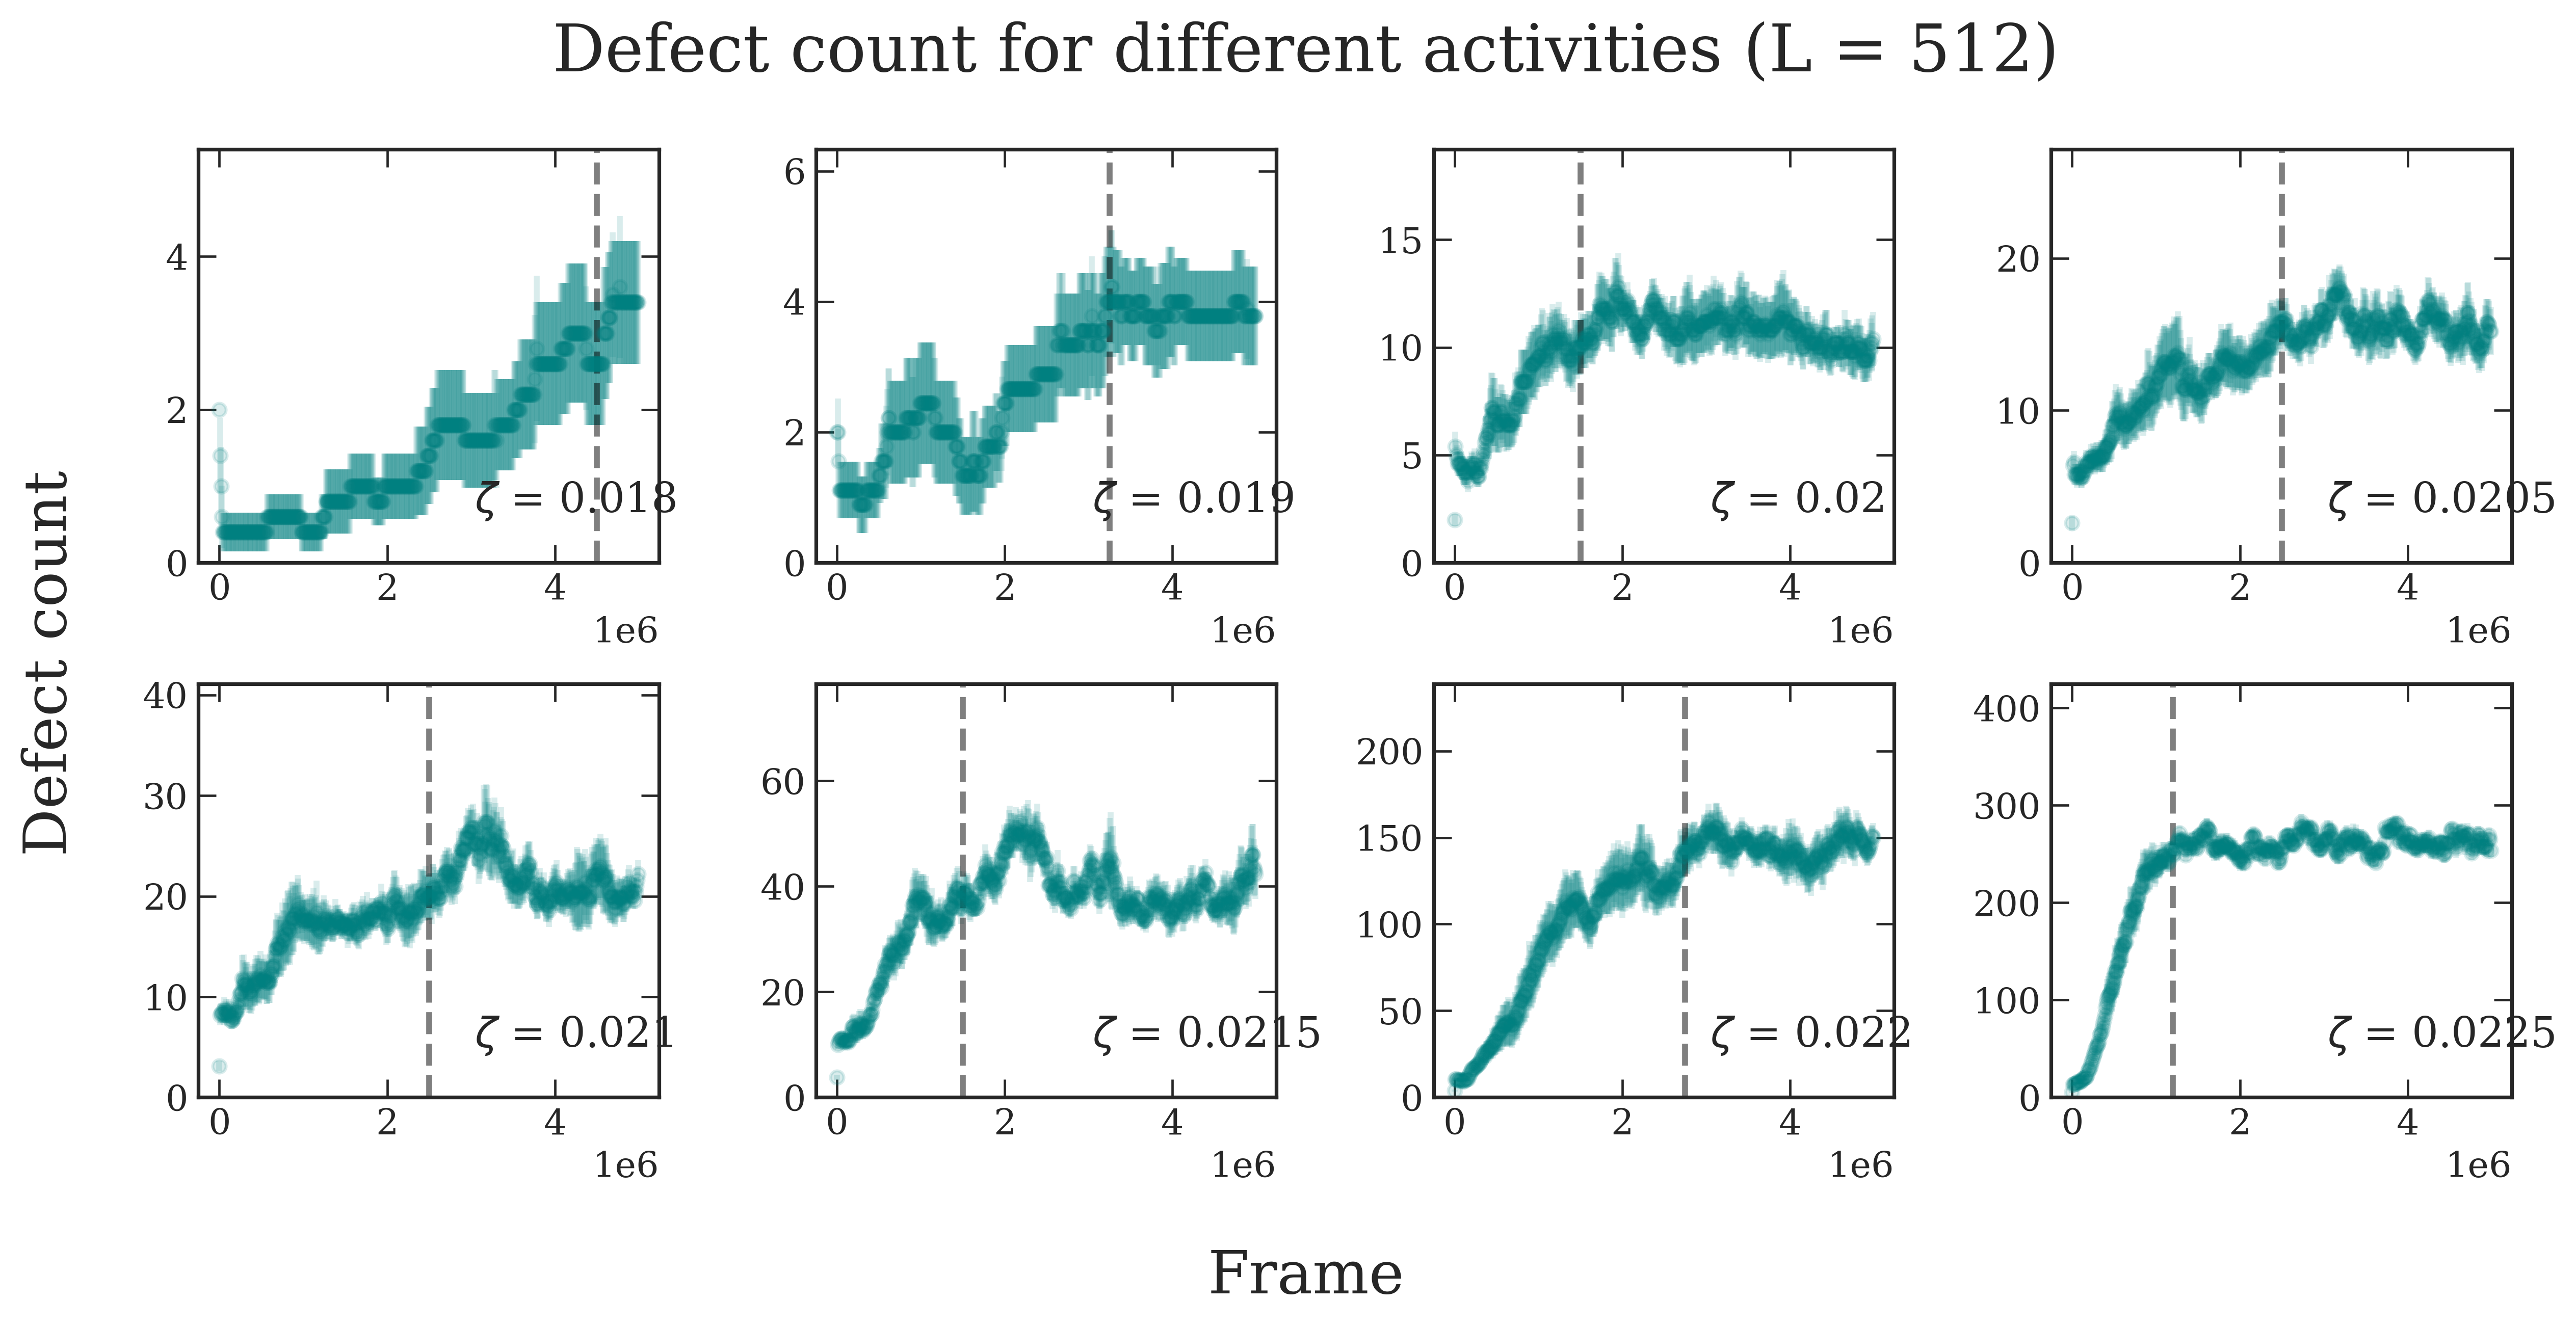

(<Figure size 5040x2520 with 8 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >], dtype=object))

In [31]:
ad.plot_defects_per_activity(Ndataset=2, )# estimate_stationarity=True, stationarity_dict=stationarity_dict)

2730000
2730000
1690000
2470000
2470000
1430000
2730000
1430000


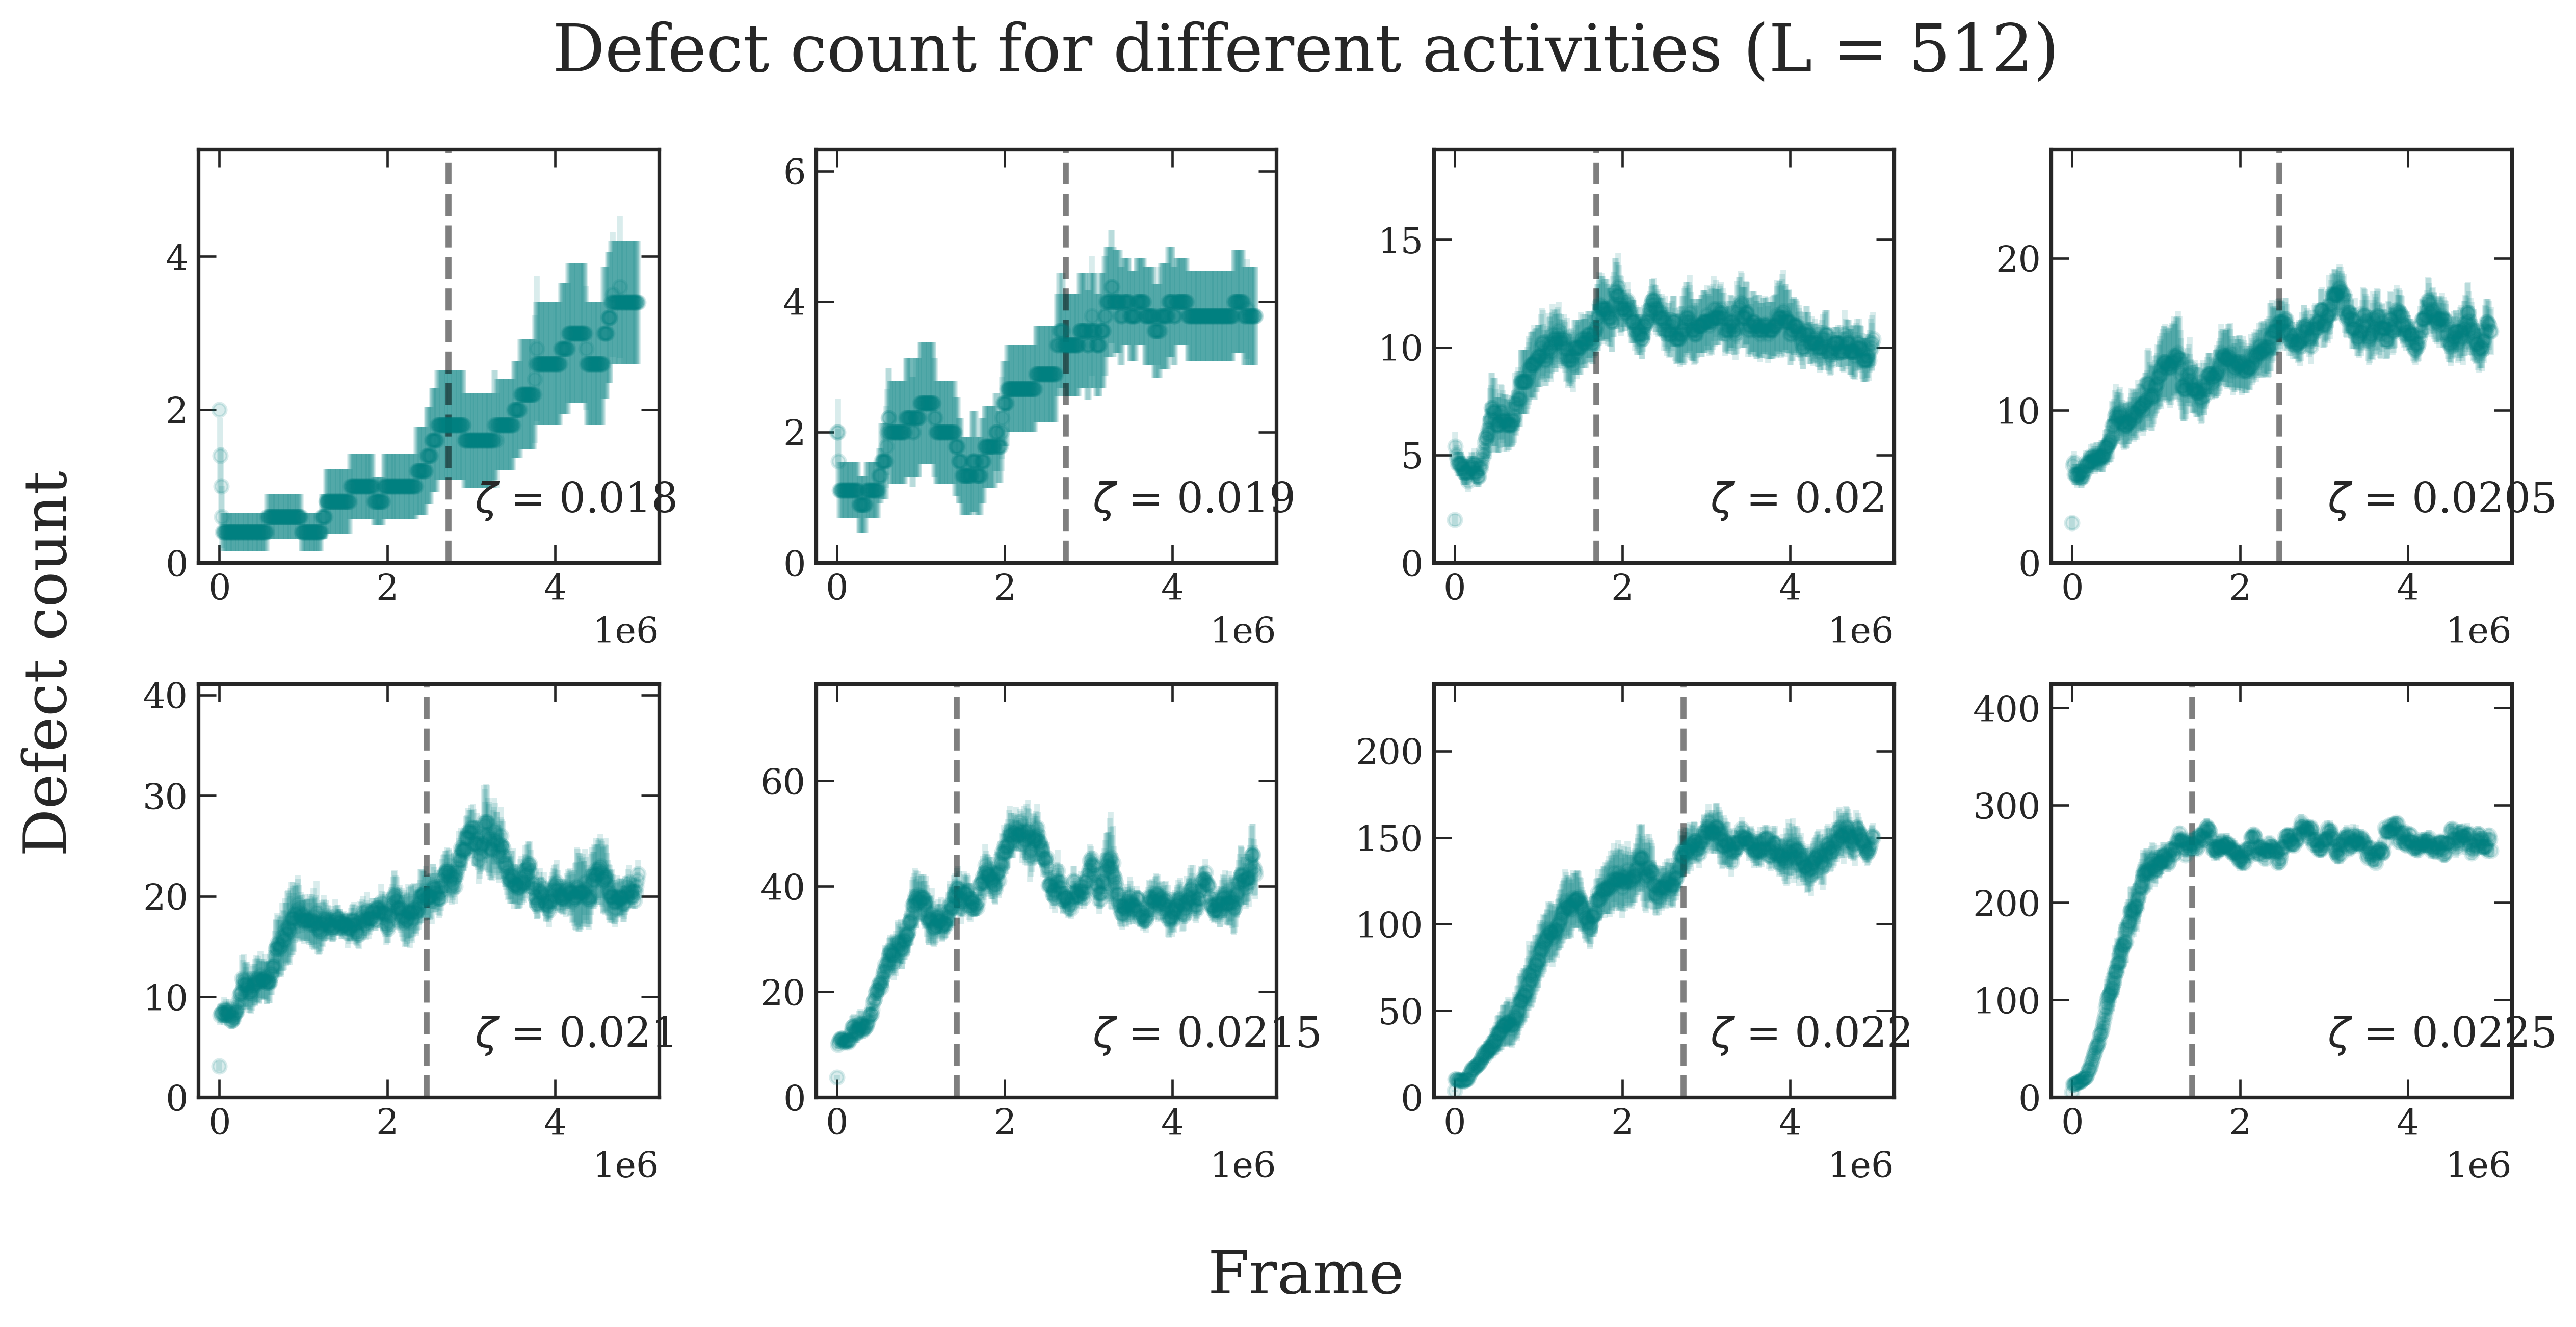

(<Figure size 5040x2520 with 8 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >], dtype=object))

In [48]:
block_len = 26
stationarity_dict = dict(interval_len = block_len, Njump = block_len, Nconverged = 200, max_sigma_dist = .75)
ad.plot_defects_per_activity(Ndataset=2, estimate_stationarity=True, stationarity_dict=stationarity_dict)

2700000
2700000
1700000
2500000
2500000
1500000
3300000
1300000


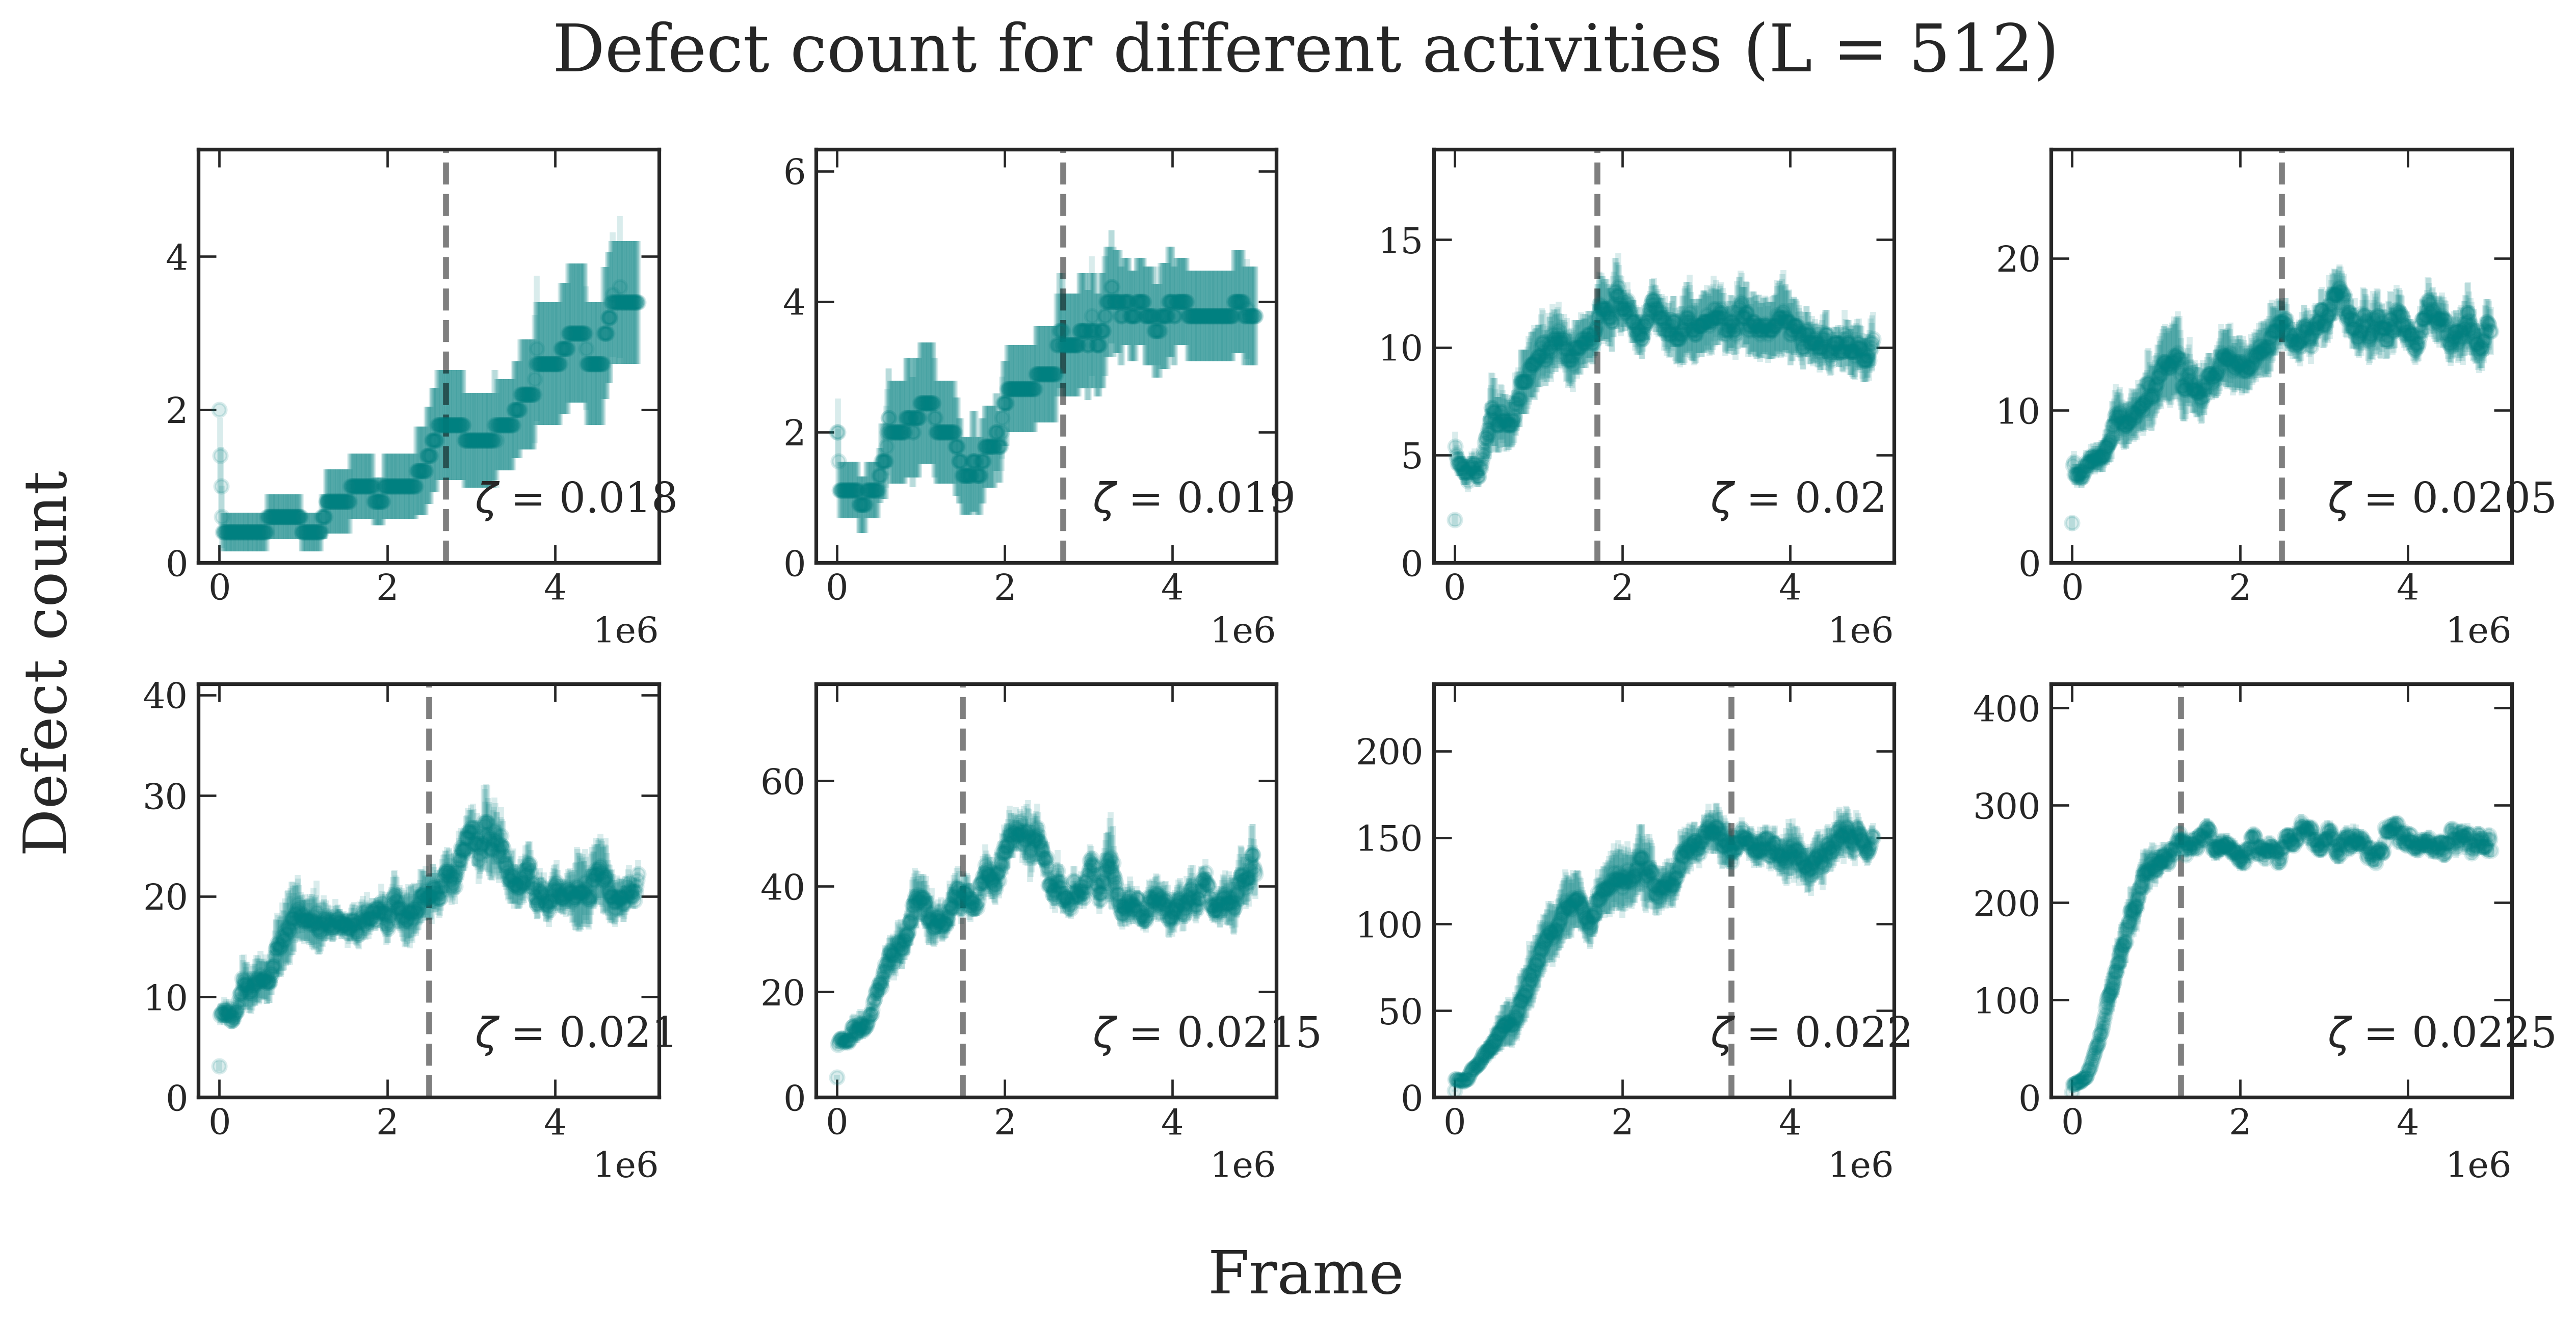

(<Figure size 5040x2520 with 8 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >], dtype=object))

In [26]:
block_len = 20
stationarity_dict = dict(interval_len = block_len, Njump = block_len, Nconverged = 200, max_sigma_dist = .5)
ad.plot_defects_per_activity(Ndataset=2, estimate_stationarity=True, stationarity_dict=stationarity_dict)

In [ ]:
block_len = 20
stationarity_dict = dict(interval_len = block_len, Njump = block_len, Nconverged = 250, max_sigma_dist = .5)
ad.update_conv_list(Ndataset_list=[2], stationarity_dict=stationarity_dict)